In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
import helper as h
import random
# from traindata import kb
kb = ['animals', 'family', 'lymphography', 'nctrer', 'suramin']

/home/student117/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# pip install wordcloud
# pip install --upgrade pip 

# pip install --upgrade Pillow

In [3]:
# fig, ax = plt.subplots(3, 3, figsize=(15,10))

# path = f"./trained_models/animals_accuracies.json"
# i = 0
# for name in kb:
#     col = i // 3, i % 3
#     path = f"./trained_models/{name}_accuracies.json"
#     acc = []
#     with open(path, 'r') as f:
#         data = json.load(f)
#     train_acc = data[0]['train_accuracy'][:1000]
#     validation_acc = data[1]['validation_accuracy'][:1000]
#     x = np.arange(1000)

#     # Create the plot
#     ax[col].plot(x, train_acc,  'b--o', markersize=0.1, label='Train Accuracy',)
#     ax[col].plot(x, validation_acc,  'g--o', markersize=0.1, label='Validation Accuracy')

#     ax[col].set_title(f'Plot of Accuracies for {name}')
#     ax[col].set_xlabel('Epochs')
#     ax[col].set_ylabel('Accuracy')
#     ax[col].legend()

#     i += 1
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
# # plt.title(f"Plot of Acc
# plt.savefig('Accuracy_plot.png')
# plt.show()

In [26]:
def plot_accuracies(kb, size, f_name, m_name, first_title='Accuracy', savepath='./', savename='accuracy_plot', save=False, rows=2):
    fig, ax = plt.subplots(rows, 3, figsize=(15,10) if rows > 1 else (15, 5))
    if rows > 1:
        fig.delaxes(ax[1][2])
    i = 0
    
    for name in kb:
        row, col = i // 3, i % 3
        datapath= f"./metrics/{name}/{name}_accuracies_{m_name}.json"
        with open(datapath, 'r') as f:
            data = json.load(f)
#         train_acc = data[0]['train_accuracy'][:size]
#         validation_acc = data[1]['validation_accuracy'][:size]
        train_acc = data[0][1][:size]
        validation_acc = data[1][1][:size]
        x = np.arange(size)

        # Create the plot
        if rows > 1:
            ax[row, col].plot(x, train_acc,  'b--o', markersize=0.1, label='Train Accuracy',)
            ax[row, col].plot(x, validation_acc,  'g--o', markersize=0.1, label='Validation Accuracy')

            
            title = f'Plot of {first_title} \nfor {name.capitalize()}'
            ax[row, col].set_title(title, size = 15)
            ax[row, col].set_xlabel('Epochs')
            ax[row, col].set_ylabel('Accuracy')
            ax[row, col].set_ylim(0, 1)
            ax[row, col].legend()
        else:
            ax[col].plot(x, train_acc,  'b--o', markersize=0.1, label='Train Accuracy',)
            ax[col].plot(x, validation_acc,  'g--o', markersize=0.1, label='Validation Accuracy')

            
            title = f'Plot of {first_title} \nfor {name.capitalize()}'
            ax[col].set_title(title, size = 15)
            ax[col].set_xlabel('Epochs')
            ax[col].set_ylabel('Accuracy')
            ax[col].set_ylim(0, 1)
            ax[col].legend()
        

        i += 1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    # if save: 
    plt.savefig(f'./metrics/images/{savename}_{f_name}.png')
    plt.savefig(f'./metrics/images/{savename}_{f_name}.eps')
    plt.savefig(f'./metrics/images/{savename}_{f_name}.pdf')
    plt.show()

In [27]:

def plot_f1(kb, size, f_name, m_name, first_title='F1', savepath='./', savename='f1_plot', save=False, rows=2):
    fig, ax = plt.subplots(rows, 3, figsize=(15,10) if rows > 1 else (15, 5))
    if rows > 1:
        fig.delaxes(ax[1][2])

    i = 0
    for name in kb:
        row, col = i // 3, i % 3
        path = f"./metrics/{name}/{name}_f1_Negation.json"
        with open(path, 'r') as f:
            data = json.load(f)
#         train_acc = data[0][1][:size]
#         validation_acc = data[1][1][:size]
        train_f1 = data[0][1][:size]
        validation_f1 = data[1][1][:size]
        x = np.arange(size)

        # Create the plot
        if rows > 1:
            ax[row, col].plot(x, train_f1,  'b--o', markersize=0.1, label='Train F1',)
            ax[row, col].plot(x, validation_f1,  'g--o', markersize=0.1, label='Validation F1')

            title = f'Plot of {first_title} \nfor {name.capitalize()}'
            ax[row, col].set_title(title)
            ax[row, col].set_xlabel('Epochs')
            ax[row, col].set_ylabel('F1')
            ax[row, col].set_ylim(0, 1)
            ax[row, col].legend()
        else:
            ax[col].plot(x, train_f1,  'b--o', markersize=0.1, label='Train F1',)
            ax[col].plot(x, validation_f1,  'g--o', markersize=0.1, label='Validation F1')

            title = f'Plot of {first_title} \nfor {name.capitalize()}'
            ax[col].set_title(title)
            ax[col].set_xlabel('Epochs')
            ax[col].set_ylabel('F1')
            ax[col].set_ylim(0, 1)
            ax[col].legend()
        

        i += 1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    if save:
        # print(
        plt.savefig(f'./metrics/images/{savename}_{f_name}.png')
        plt.savefig(f'./metrics/images/{savename}_{f_name}.eps')
        plt.savefig(f'./metrics/images/{savename}_{f_name}.pdf')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


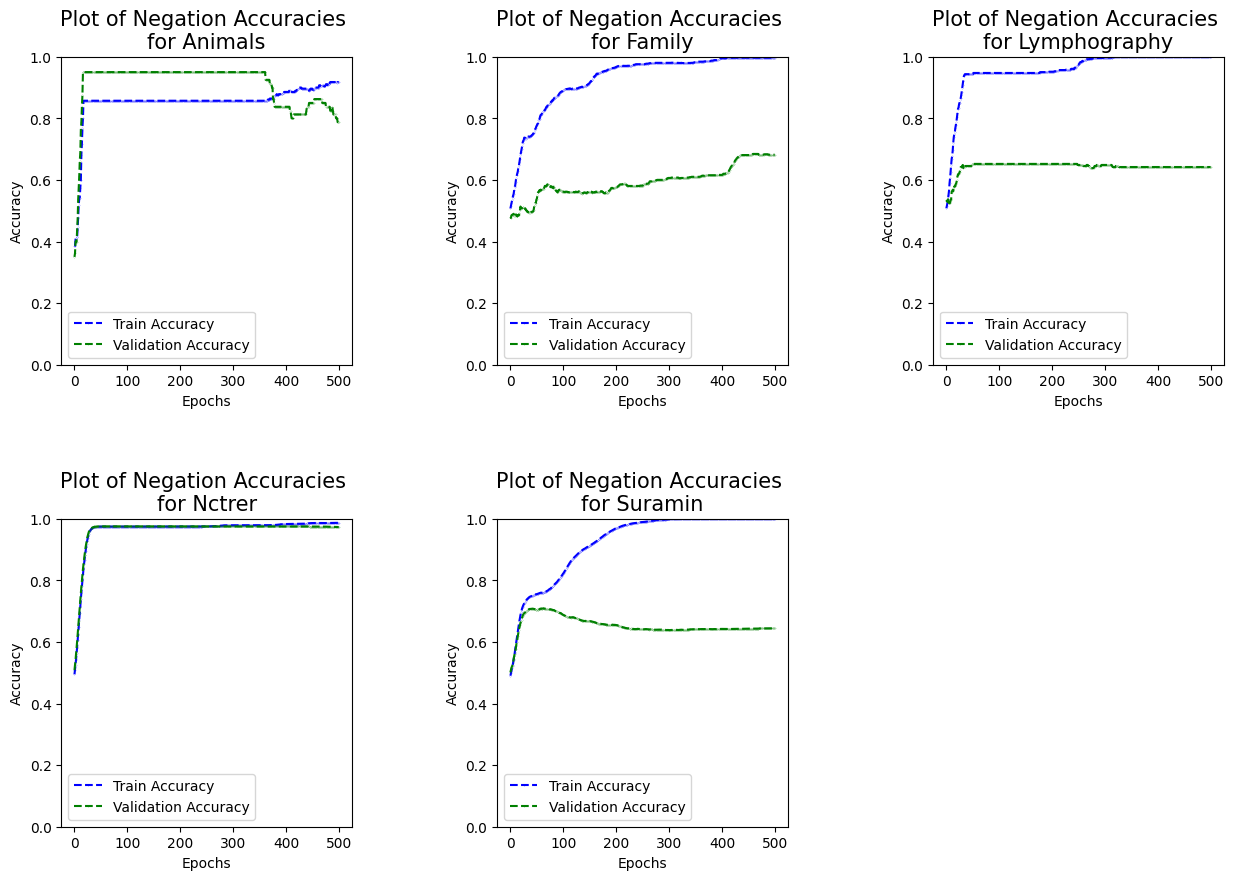

In [28]:
# Accuracies for Negation
kb = ['animals', 'family', 'lymphography',  'nctrer', 'suramin']#, 'carcinogenesis', 'vicodi']#, 'vicodi',
plot_accuracies(kb, 500, 'negation', 'Negation', first_title="Negation Accuracies", save=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


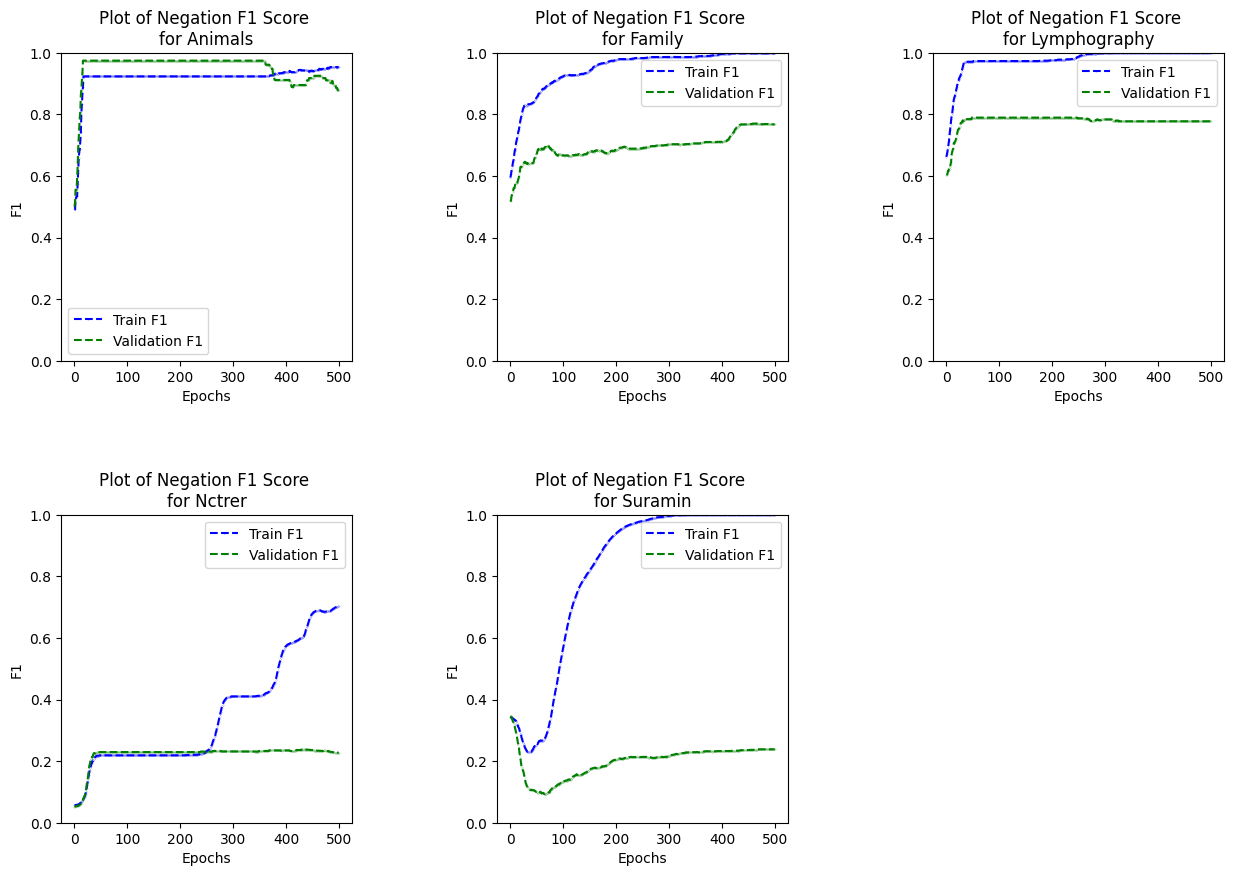

In [29]:
# F1 score for Negation
# kb = ['animals', 'family', 'lymphography',  'nctrer', 'suramin']#, 'carcinogenesis', 'vicodi']#, 'vicodi',
plot_f1(kb, 500, 'negation_f1', 'Negation', first_title="Negation F1 Score", save=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


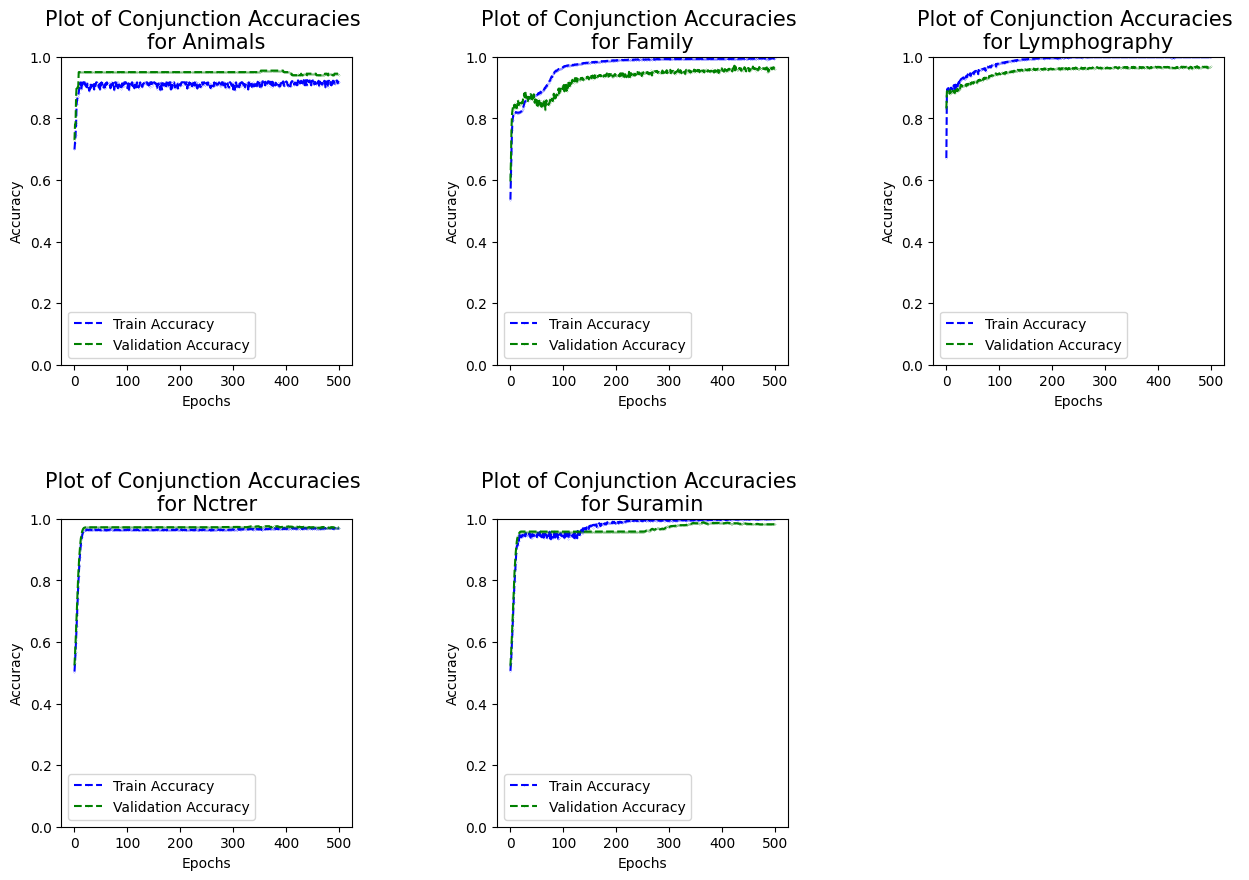

In [30]:
# Accuracies for Conjunction
plot_accuracies(kb, 500, 'conjunction', 'Conjunction', first_title='Conjunction Accuracies', save=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


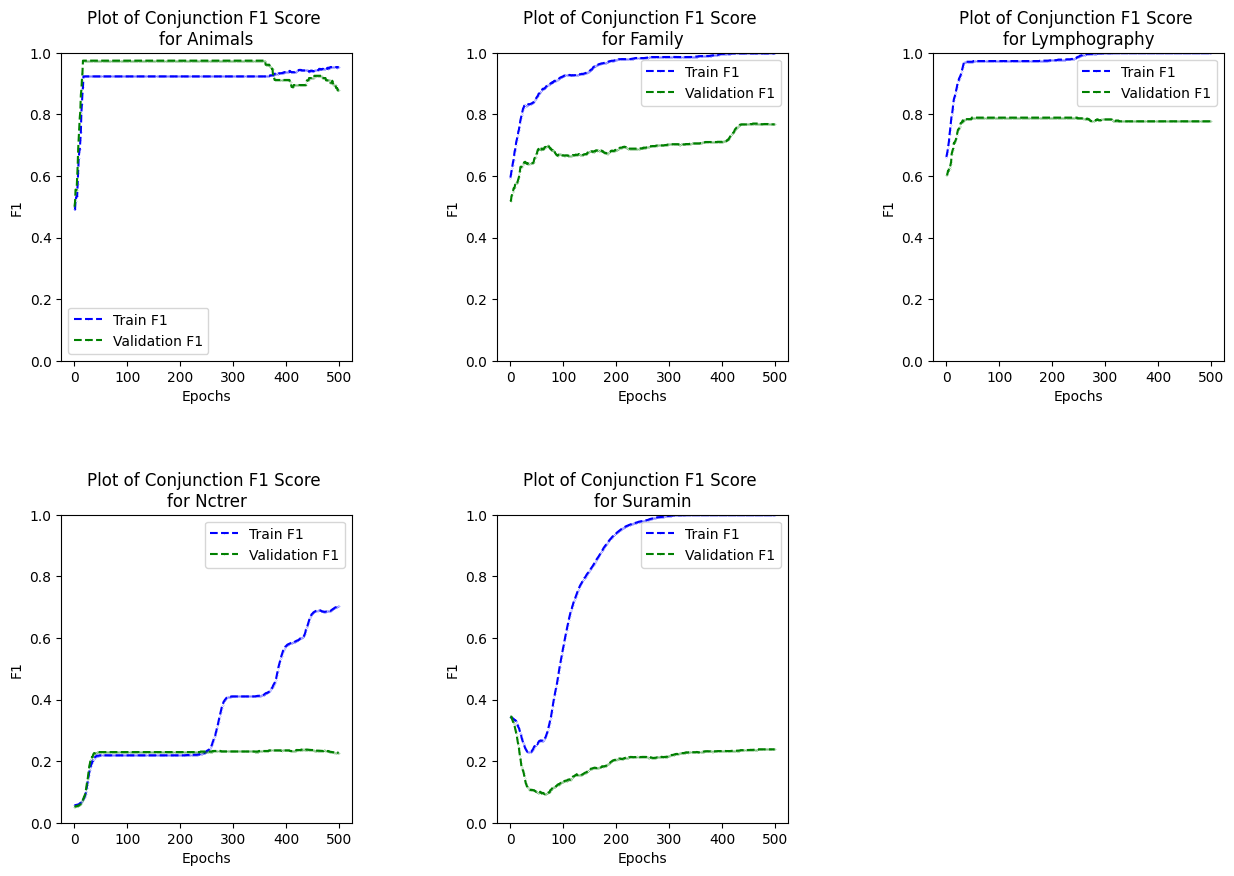

In [31]:
# F1 Score for Conjunction
plot_f1(kb, 500, 'conjunction_f1', 'Conjunction', first_title="Conjunction F1 Score", save=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


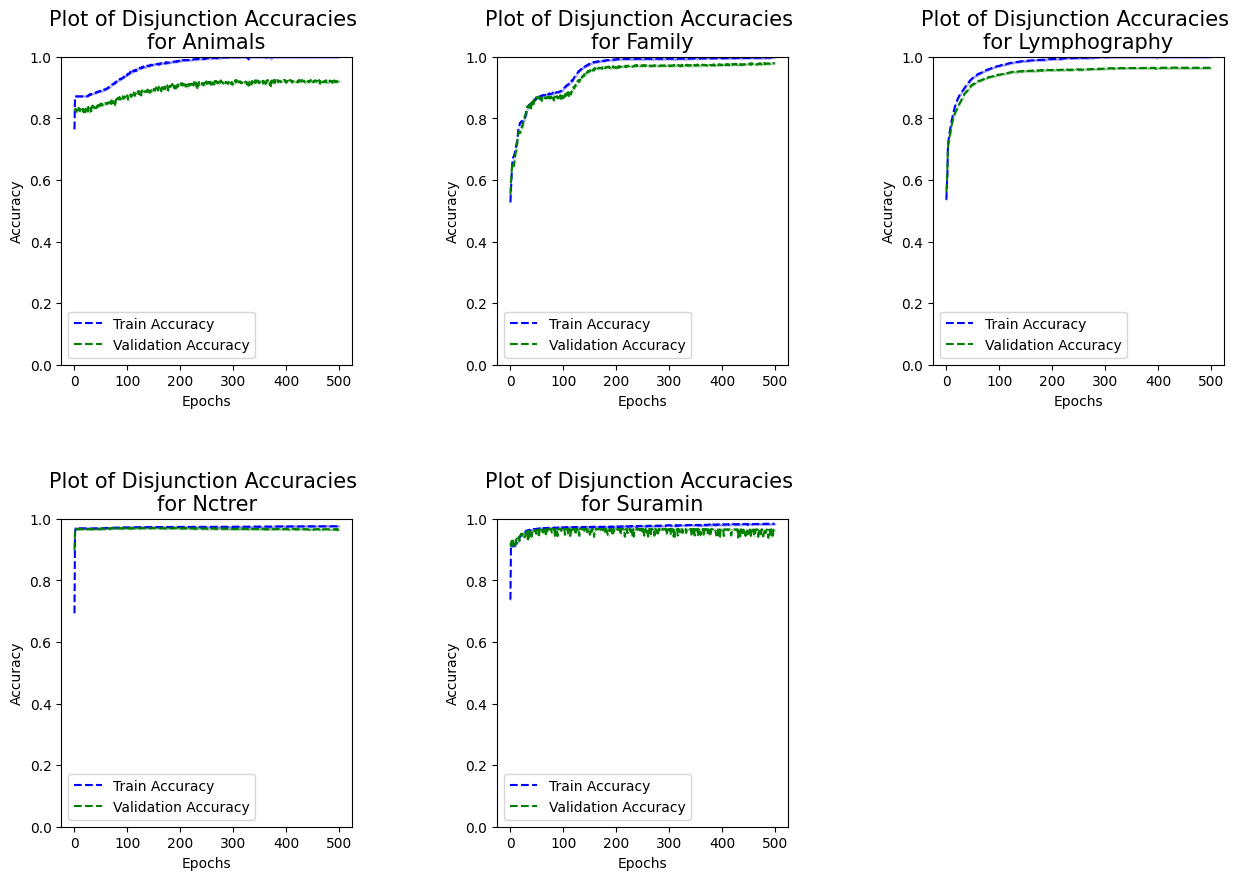

In [32]:
# Accuracies for Disjunction
plot_accuracies(kb, 500, 'disjunction', 'Disjunction', first_title='Disjunction Accuracies', save=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


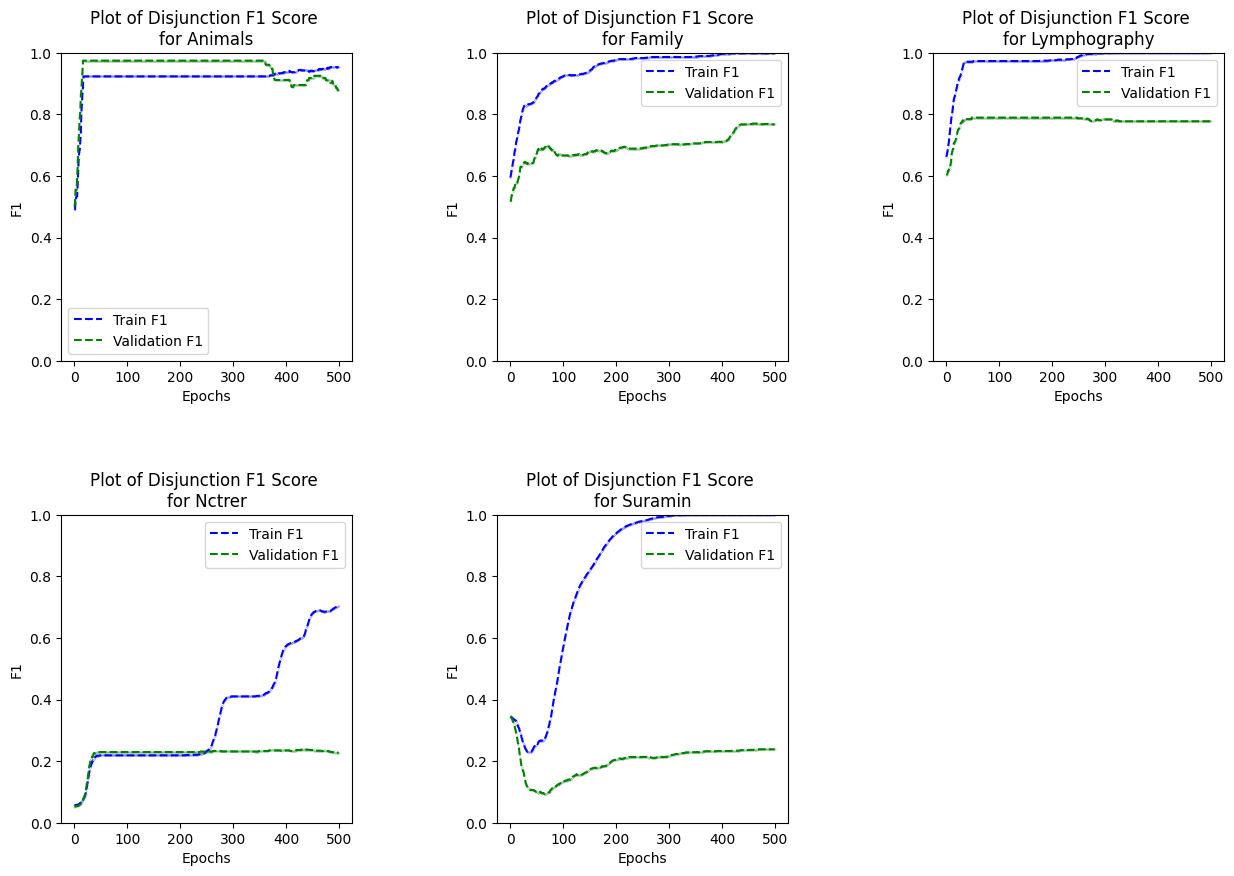

In [33]:
# F1 Score for Disjunction
plot_f1(kb, 500, 'disjunction_f1', 'Disjunction', first_title="Disjunction F1 Score", save=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


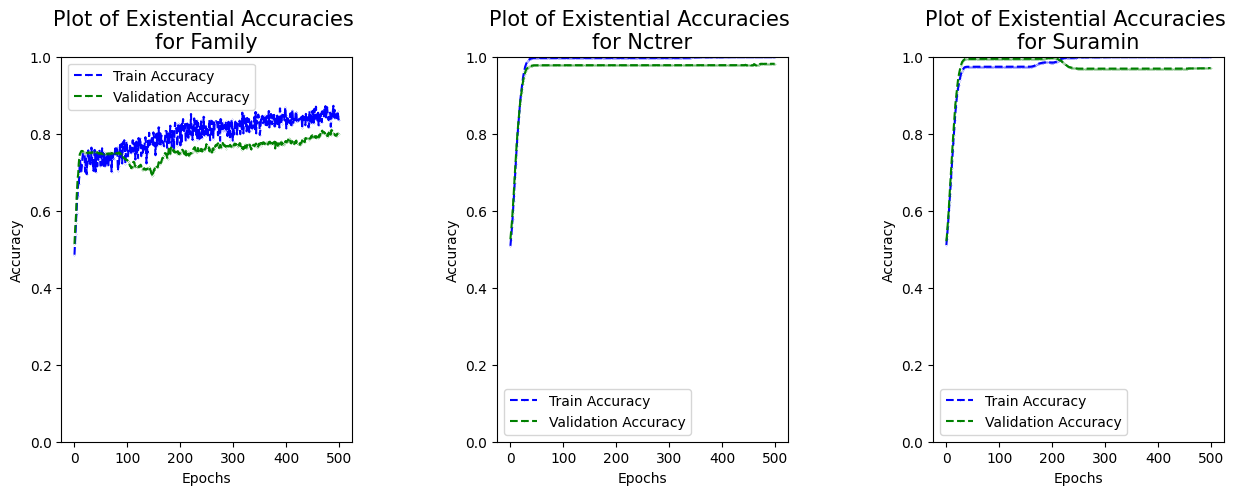

In [34]:
# Accuracies for Existential
kb = ['family', 'nctrer', 'suramin']
plot_accuracies(kb, 500, 'existential', 'Existential', first_title='Existential Accuracies', save=True, rows=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


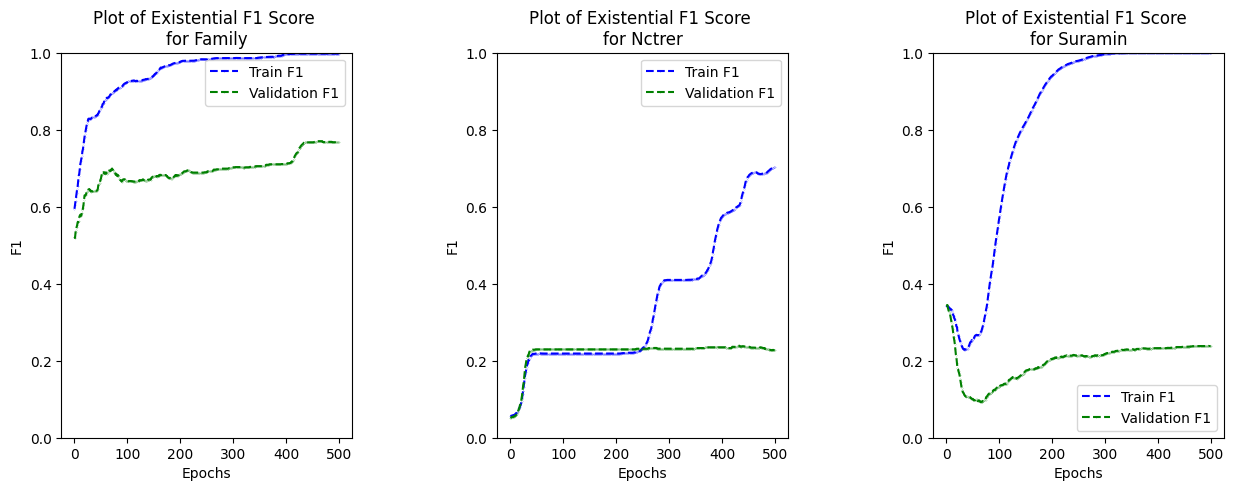

In [35]:
# F1 Score for Existential
kb = ['family', 'nctrer', 'suramin']
plot_f1(kb, 500, 'existential_f1', 'Existential', first_title="Existential F1 Score", save=True ,rows=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


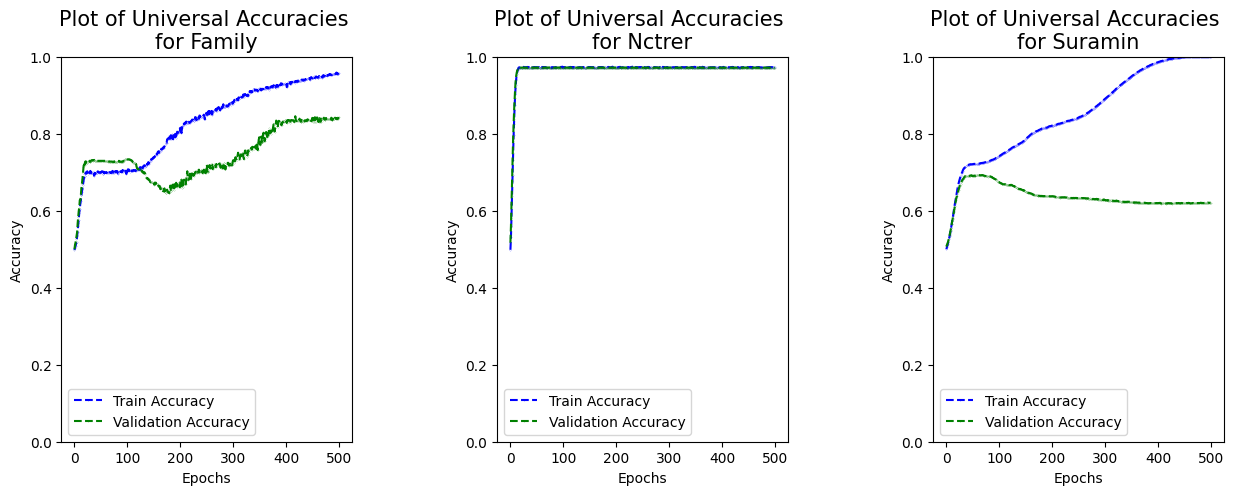

In [36]:
# Accuracies for Universal
kb = ['family', 'nctrer', 'suramin']
plot_accuracies(kb, 500, 'universal', 'Universal', first_title='Universal Accuracies', save=True, rows=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


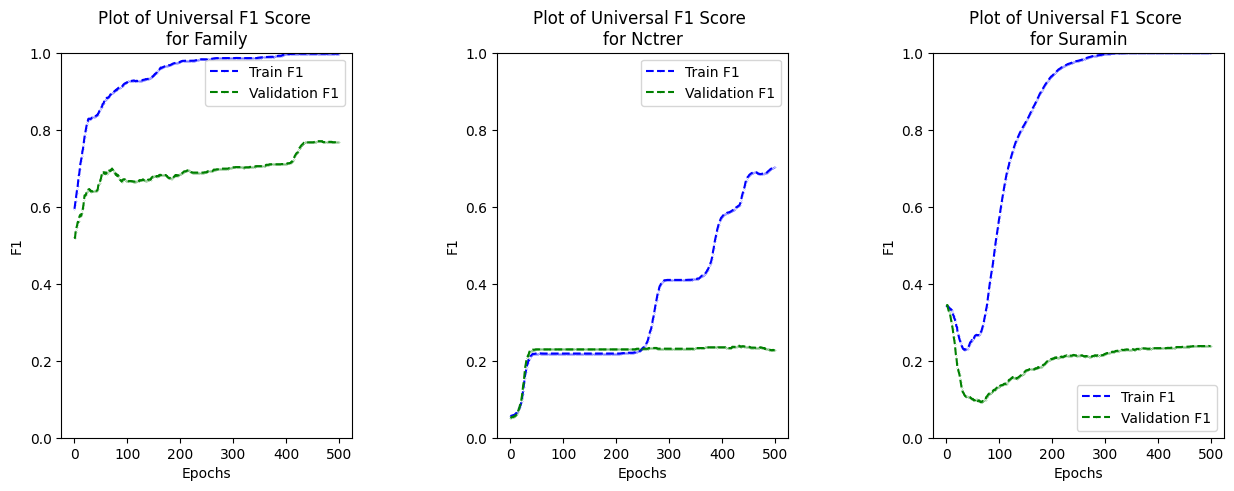

In [39]:
# F1 Score for Universal
kb = ['family', 'nctrer', 'suramin']
plot_f1(kb, 500, 'universal_f1', 'Universal', first_title="Universal F1 Score", save=True, rows=1)

In [1]:
!ls dataset_info

 animals.eps	 dt.csv			      Mutagenesis.png
 Animals.eps	 Family.eps		      Nctrer.eps
 animals.png	 Family.png		      Nctrer.png
 Animals.png	 Lymphography.eps	      partitions.xlsx
 dataset.csv	 Lymphography.png	     'Semantic Bible.eps'
 dataset.eps	 Mutagenesis.eps	     'Semantic Bible.png'
 dataset.png	 Mutagenesis_partitions.eps   Suramin.eps
 datasets.xlsx	 Mutagenesis_partitions.png   Suramin.png


In [3]:
dataset = pd.read_excel('dataset_info/datasets.xlsx', sheet_name='Sheet2')
dataset

,Dataset,Old Data Expressions,New Data Expressions,Number of Individuals
0,Animals,704,629,20
1,Lymphography,4168,846,148
2,Suramin,714,723,2979
3,Nctrer,248,577,10209
4,Family,24251,381,202


In [16]:
exp = dataset['New Data Expressions']
ind = dataset['Number of Individuals']
label = dataset['Dataset']


barWidth = 0.25
bar1 = np.arange(len(exp))
bar2 = [x+barWidth for x in bar1]

fig = plt.subplots(figsize =(12, 8)) 
# Make the plot
plt.bar(bar1, exp, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Number of Expressions') 
plt.bar(bar2, ind, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Number of Individuals') 
 
# Adding Xticks 
plt.xlabel('Dataset', fontweight ='bold', fontsize = 15) 
plt.ylabel('Number of Expressions / Individuals', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(exp))], label)
 
plt.legend()
plt.savefig('dataset.png')
plt.savefig('dataset.pdf')
plt.savefig('dataset.eps')

plt.show() 

NameError: name 'dataset' is not defined

In [ ]:
# partitions = pd.read_excel('dataset_info/partitions.xlsx') ../../datasets.xlsx
partitions = pd.read_excel('../../datasets.xlsx', sheet_name='Sheet3')
partitions


,Dataset,Atomic Base,Atomic Negated,Atomic,Conjunction,Disjunction,Existential,Universal,Expression 3,Total
0,Animals,18,18,36,50,543,0,0,593,629
1,Family,17,17,34,120,138,41,48,347,381
2,Lymphography,7,7,14,362,470,0,0,832,846
3,Nctrer,14,14,28,33,449,9,58,549,577
4,Suramin,12,12,24,28,644,7,20,699,723


In [ ]:
!pwd
!ls ../../datasets.xlsx

/home/student117/Documents/aims/project/nircel/AIMS-Project/code/python


../../datasets.xlsx


In [ ]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
# plt.pie(pie_shares, labels = ?positions, autopct = autopct_format(pie_shares))


In [38]:
labels_names_1 = ['Atomic Expressions', 'Disjunction', 'Conjunction', 'Existential', 'Universal']
labels_names_2 = ['Atomic Expressions', 'Disjunction', 'Conjunction']


labels_1 = [3, 5, 4, 6, 7]
labels_2 = [3, 5, 4]
# values = lambda x: '{:.0f}'.format(x*values.sum()/100)
# fig, ax = plt.subplots(3, 2, figsize=(15,10))
# plt.rcParams.update({'font.size': 15})
for i in list(range(len(partitions['Dataset']))):
    name = partitions.iloc[i, 0]
    
    labels_names = labels_names_2 if name in ['Animals', 'Lymphography'] else labels_names_1
    labels = labels_2 if name in ['Animals', 'Lymphography'] else labels_1
    animals = list(partitions.iloc[i, labels])
    fig = plt.figure(figsize=(10, 10))
    
    plt.pie(animals, labels=labels_names, autopct=autopct_format(animals), radius=1.1)
    plt.title(f'Partitions of {name} Dataset', fontsize=20)
    
    plt.savefig(f'./dataset_info/{name.lower()}/dataset_pie.png')
    plt.savefig(f'./dataset_info/{name.lower()}/dataset_pie.pdf')
    plt.savefig(f'./dataset_info/{name.lower()}/dataset_pie.eps')
    plt.show()


# plt.show()
    # list(animals)


NameError: name 'partitions' is not defined

# Bar Chart for Expressions + Rotations

In [112]:
outer_labels_names = ['Atomic Expressions', 'Disjunction', 'Conjunction', 'Existential', 'Universal']
outer_labels = [3, 6, 9, 12, 15]
atomic = partitions['Atomic']
disj = partitions['Disjunction']
conj = partitions['Conjunction']
exist = partitions['Existential']
uni = partitions['Universal']
data = [atomic, disj, conj, exist, exist, uni]


barWidth = 0.2
bar1 = np.arange(len(atomic))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]
# bar4 = [x + barWidth for x in bar3]
# bar5 = [x + barWidth for x in bar4]
# bars = [bar1, bar2, bar3, bar4, bar5]

# fig = plt.subplots(figsize=(15, 8))
# for i in range(len(outer_labels_names)):
#     plt.bar(bars[i], data[i], width = barWidth, label=outer_labels_names[i])

# # Adding Xticks 
# plt.xlabel('Dataset', fontweight ='bold', fontsize = 15) 
# plt.ylabel('Number of Expressions', fontweight ='bold', fontsize = 15) 
# plt.xticks([r + barWidth for r in range(len(exp))], label)
# plt.legend()
# plt.show()
print(bar1)
print(bar2)

[0 1 2 3 4]
[0.2, 1.2, 2.2, 3.2, 4.2]


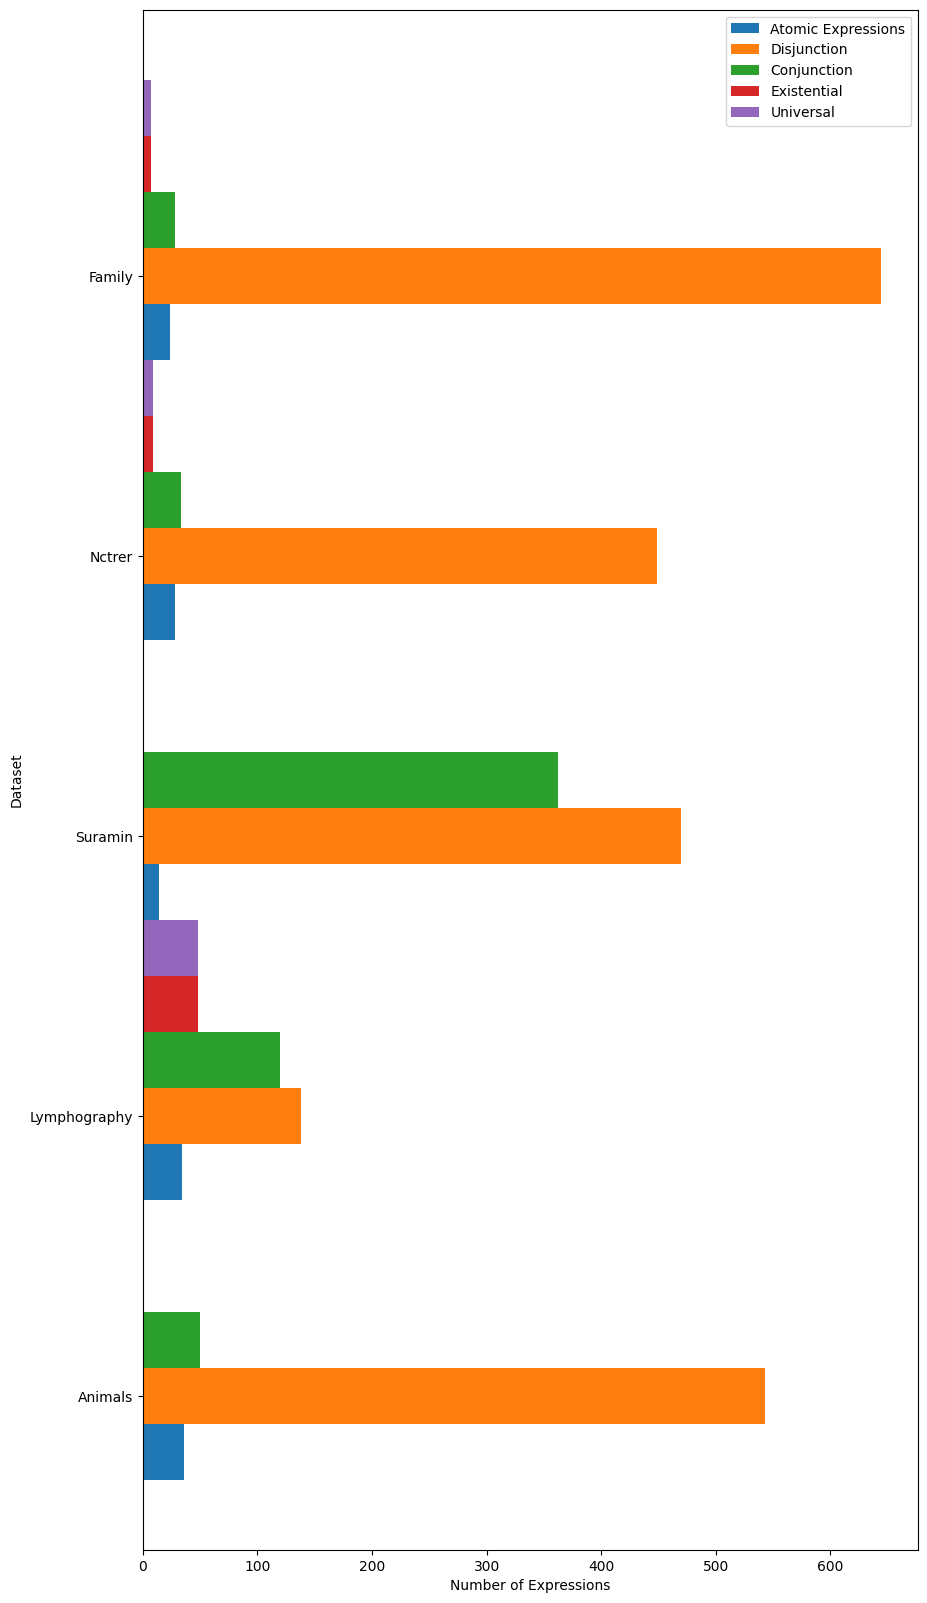

In [47]:
# ndataset = 5
# w = 0.3
# dimw = w / ndataset
# x = np.arange(len(outer_labels))

# fig, ax = plt.subplots(figsize=(15, 8))
# for i in range(len(outer_labels_names)):
#     b = ax.barh(bars[i], data[i], width = barWidth, label=outer_labels_names[i])

import numpy as np
import matplotlib.pyplot as plt

# Assuming partitions dictionary is already defined with appropriate data
# partitions = {
#     'Atomic': [3, 5, 1, 2, 4],
#     'Disjunction': [2, 3, 4, 1, 2],
#     'Conjunction': [3, 4, 2, 5, 6],
#     'Existential': [5, 6, 3, 4, 7],
#     'Universal': [4, 2, 5, 6, 3]
# }

# Define the data and labels
# outer_labels_names = ['Atomic Expressions', 'Disjunction', 'Conjunction', 'Existential', 'Universal']
# atomic = partitions['Atomic']
# disj = partitions['Disjunction']
# conj = partitions['Conjunction']
# exist = partitions['Existential']
# uni = partitions['Universal']
# data = [atomic, disj, conj, exist, uni]

# Bar width
barWidth = 0.2

# Set positions of bars
bar1 = np.arange(len(atomic))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]
bar4 = [x + barWidth for x in bar3]
bar5 = [x + barWidth for x in bar4]
bars = [bar1, bar2, bar3, bar4, bar5]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 20))

for i in range(len(outer_labels_names)):
    ax.barh(bars[i], data[i], height=barWidth, label=outer_labels_names[i])

# Adding labels
ax.set_xlabel('Number of Expressions')
ax.set_ylabel('Dataset')
ax.set_yticks([r + barWidth for r in range(len(exp))], label)
# ax.set_yticklabels()

# Add legend
ax.legend()

# Display the plot
plt.show()


# Nested Pie plot

In [19]:
# outer_labels_names = ['Atomic Expressions', 'Disjunction', 'Conjunction', 'Existential', 'Universal']
# outer_labels = [3, 6, 9, 12, 15]
# inner_labels_names = ['Atomic Base', 'Atomic Neg.', 'Disjunction Base',  'Disjunction Neg.', 'Conjunction Base',  'Conjunction Neg.', 'Existential Base', 'Existential Neg.', 'Universal Base',  'Universal Neg.'] 
# inner_labels = [1, 2, 4, 5, 7, 8, 10, 11, 13, 14]
# size = 0.5

# # values = lambda x: '{:.0f}'.format(x*values.sum()/100)
# # fig, ax = plt.subplots(3, 2, figsize=(15,10))

# for i in list(range(len(partitions['Dataset']))):
#     # row, col = i % 3 , i // 3
#     animals = list(partitions.iloc[i, labels])
#     name = partitions.iloc[i, 0]
#     animals
#     # fig = plt.figure(figsize=(10, 10))
#     plt.pie(outer_labels, labels=outer_labels_names, radius=2, autopct=autopct_format(animals))
#     plt.pie(inner_labels, labels=inner_labels_names, radius=2-size, autopct=autopct_format(animals))
#     plt.title(f'Partitions of {name} Dataset')

#     # plt.savefig(f'./dataset_info/{name}.png')
#     # plt.savefig(f'./dataset_info/{name}.eps')
    
# # plt.subplots_adjust(wspace=0.5, hspace=0.5)
#     plt.savefig(f'./dataset_info/dataset_pie.png')
#     plt.savefig(f'./dataset_info/dataset_pie.pdf')
#     plt.savefig(f'./dataset_info/dataset_pie.eps')
    
    
#     plt.show()
#     # list(animals)


In [22]:
kb = ['animals', 'family', 'lymphography', 'suramin', 'nctrer']
for kbn in kb:
    print(f"In {kbn}")
    df = pd.read_csv(f'./training_data/{kbn}_emb.csv')
    print(list(df.isnull().sum())[1])

In animals
0
In family
0
In lymphography
0
In suramin
0
In nctrer
0


In [20]:
list(df.isnull().sum())[1]

21

In [20]:
# df1 = pd.read_csv('./NCESData/mutagenesis/embeddings/ConEx_entity_embeddings.csv')
# df1 = pd.read_csv('./NCESData/mutagenesis/embeddings/ConEx_entity_embeddings.csv')

In [21]:
# df1.isnull().sum()

In [32]:
# import matplotlib.pyplot as plt

# # Example data
# outer_labels = ['Region A', 'Region B', 'Region C']
# outer_sizes = [30, 45, 25]
# inner_labels = ['Product 1', 'Product 2', 'Product 3', 'Product 4', 'Product 5', 'Product 6']
# inner_sizes = [10, 20, 15, 10, 25, 20]

# # Colors
# outer_colors = ['#ff9999','#66b3ff','#99ff99']
# inner_colors = ['#c2c2f0','#ffb3e6', '#c4e17f', '#ffcc99', '#ff9999','#66b3ff']

# fig, ax = plt.subplots()

# # Outer pie
# ax.pie(outer_sizes, labels=outer_labels, colors=outer_colors, radius=1.3, wedgeprops=dict(width=0.3, edgecolor='w'))

# # Inner pie
# ax.pie(inner_sizes, labels=inner_labels, colors=inner_colors, radius=1.0, wedgeprops=dict(width=0.4, edgecolor='w'))

# # Equal aspect ratio ensures that pie is drawn as a circle
# ax.axis('equal')

# plt.show()


data = ((1000, 30), (30, 10), 
        (30, 100), (800, 500),  
        (50, 10)) 
len(data[0])
np.arange(len(data))

array([0, 1, 2, 3, 4])

In [21]:
def neg(exp):
    exp_b = exp.replace('¬', '')
    return exp_b
    # b_emb = self.embedding.loc[exp_b]
    # return torch.tensor(b_emb, dtype=torch.float32)

def process(ele):
        ele = ele.strip().replace('(', '').replace(')', '')
        exp_emb = neg(ele) if '¬' in ele else ele
        return exp_emb


def get_atoms(data):
    atoms = []
    for exp in data:
        if ' ' not in exp:
            if '¬' in exp:
                atoms.append(exp.replace('¬', ''))
            else:
                atoms.append(exp)
        elif (h.quant(exp) or h.const(exp)) and h.top_bot(exp):
            exp_emb = []
            if (' ⊔ ' in exp):
                parts = exp.split(' ⊔ ')
                parts = [process(part) for part in parts]
                atoms.append(parts[0])
                atoms.append(parts[1])
                # for part in parts:
                #     print("ele: ", exp, torch.max(part))
                # return (parts, label)
                
            elif (' ⊓ ' in exp):
                parts = exp.split(' ⊓ ')
                parts = [process(part) for part in parts]
                atoms.append(parts[0])
                atoms.append(parts[1])
                # return (parts, label)
                
            else:
                if (exp.startswith('∀')):
                    # print("catch", exp)
                    parts = exp.split(' ')[1].split('.')
                    parts = [process(part) for part in parts]
                    atoms.append(parts[0])
                    atoms.append(parts[1])
                    # return (parts, label)
                    
                elif (exp.startswith('∃')):
                    parts = exp.split(' ')[1].split('.')
                    parts = [process(part) for part in parts]
                    atoms.append(parts[0])
                    atoms.append(parts[1])
                    # return (parts, label)
                else:
                    print('Failed', exp)
                
    return atoms

In [22]:
path = f'./training_data/train_data_family.json'


def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    data = [exp for (exp, label) in data]
    return data

data = read_json(path)
# data = ', '.join(data)
data = get_atoms(data)
data = ', '.join(data)
data

'married, Granddaughter, married, Granddaughter, Brother, Male, Brother, Male, Mother, Son, Grandparent, Male, Grandparent, Male, Grandfather, Sister, Grandparent, Grandson, Grandparent, Grandson, Granddaughter, Male, Daughter, Parent, Daughter, Parent, Son, Son, Brother, Grandfather, Brother, Grandfather, Daughter, Sister, Daughter, Sister, Female, Grandparent, Female, Grandparent, Brother, Grandson, Brother, Grandson, hasParent, Son, Grandfather, PersonWithASibling, Grandfather, PersonWithASibling, Daughter, Daughter, Male, Mother, Sister, Sister, Male, Son, Male, Son, Grandchild, Grandmother, Brother, Female, Father, PersonWithASibling, Father, PersonWithASibling, Grandchild, Grandmother, Male, PersonWithASibling, Male, PersonWithASibling, Grandson, PersonWithASibling, Grandson, PersonWithASibling, Parent, Parent, Grandchild, Son, Grandchild, Son, hasSibling, Granddaughter, hasSibling, Granddaughter, Mother, PersonWithASibling, Mother, PersonWithASibling, Child, PersonWithASibling, 

In [22]:
# wc = WordCloud(background_color="white", font_path="./arial.ttf", width=800, height=400).generate("foo bar foo bar hello world")

In [42]:
# for data_name in kb:
#     comp = []
#     count = 0
#     data_path = f'NCESData/{data_name}/training_data/Data.json'
#     save_path = f'./testing_data/{data_name}/Data.json'
#     with open(data_path, 'r') as f:
#         data = json.load(f)
    
#     expressions = list(data.items())
#     random.shuffle(expressions)
#     for (exp, val) in expressions:
#         if ' ' in exp and (not (h.quant(exp) or h.const(exp))):
#             # print("exp", exp)
#             comp.append((exp, val))
#             count += 1

#             if count == 100:
#                 break
    
#     with open(save_path, 'w') as f:
#         json.dump(comp, f)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


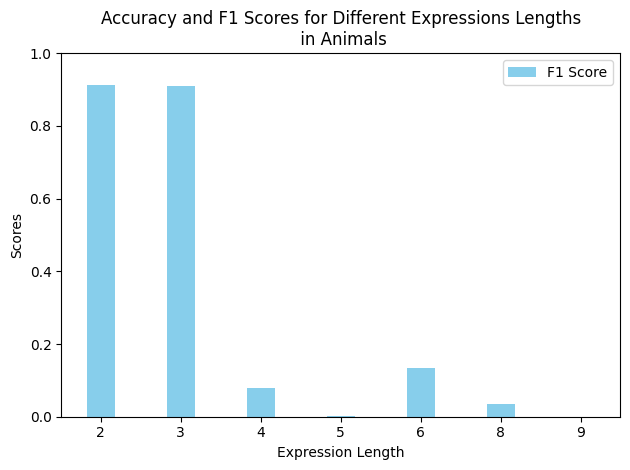

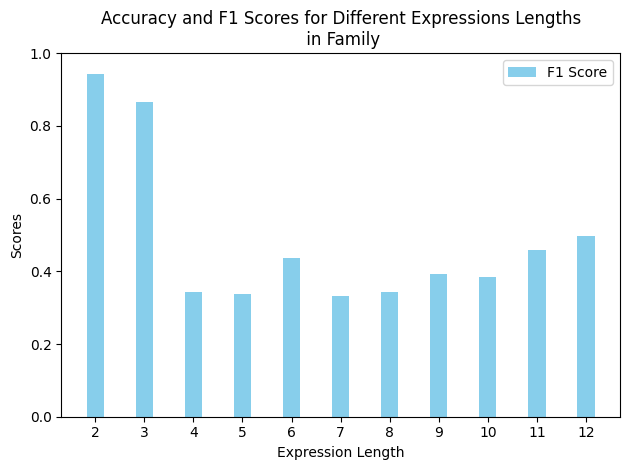

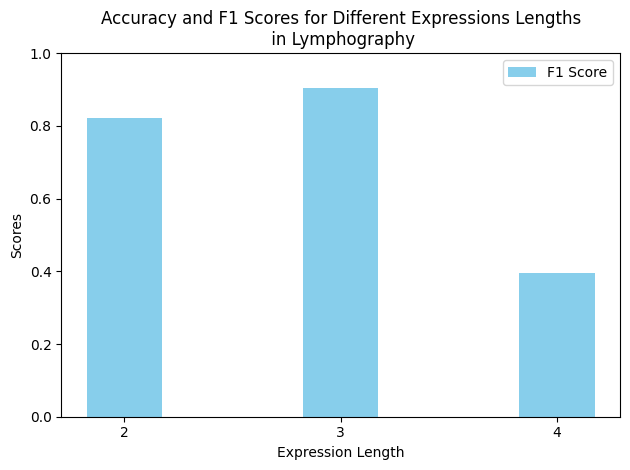

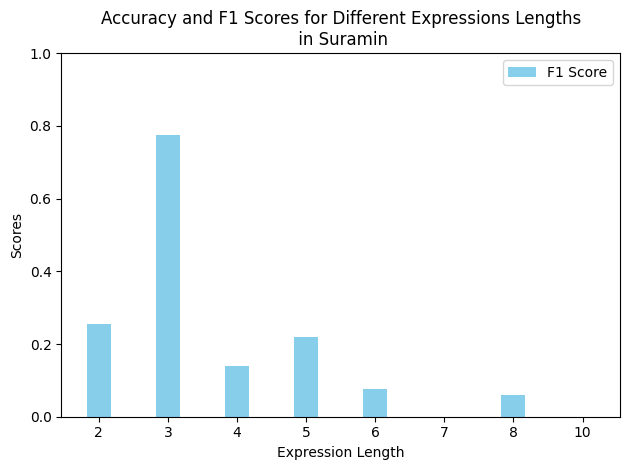

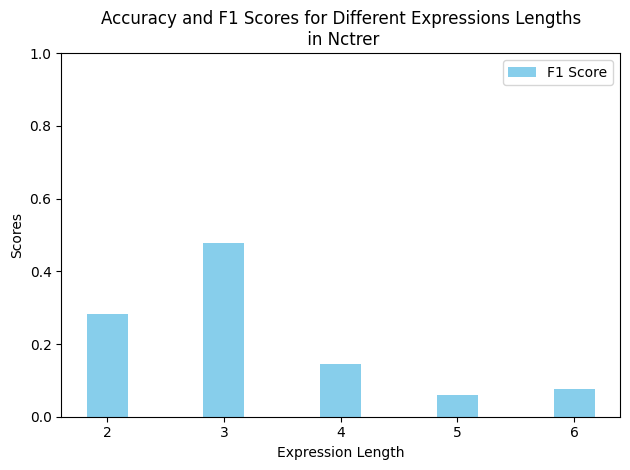

In [46]:
kb = ['animals', 'family', 'lymphography', 'suramin', 'nctrer']

for data_name in kb:
    with open(f'./metrics/{data_name}/{data_name}_performance_per_len_updated.json', 'r') as f:
        data = json.load(f)
    # print(data)

    classes = list(data.keys())
    f1_scores = [data[cls]['f1'] for cls in classes]

    x = np.arange(len(classes))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(classes, f1_scores, width, label='F1 Score', color='skyblue')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Expression Length')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Scores')
    ax.set_title(f'Accuracy and F1 Scores for Different Expressions Lengths\n in {data_name.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    plt.savefig(f'./metrics/images/testing_f1_{data_name}.pdf')
    plt.savefig(f'./metrics/images/testing_f1_{data_name}.eps')

    fig.tight_layout()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


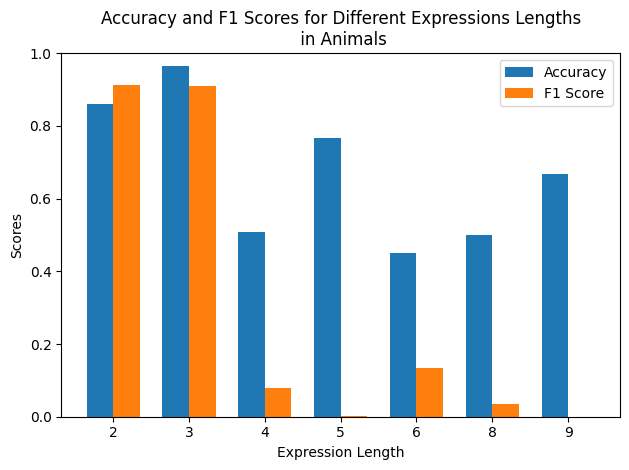

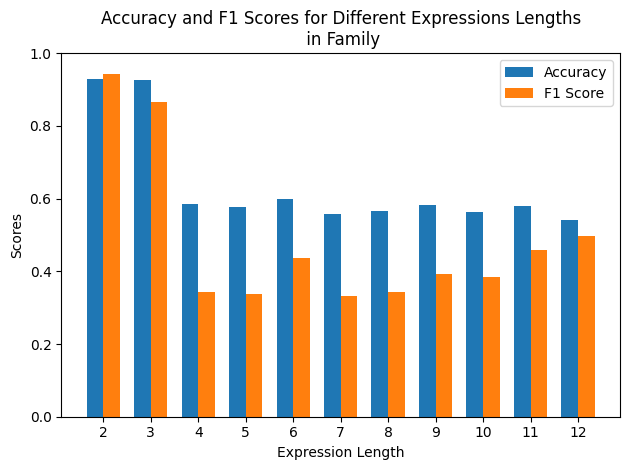

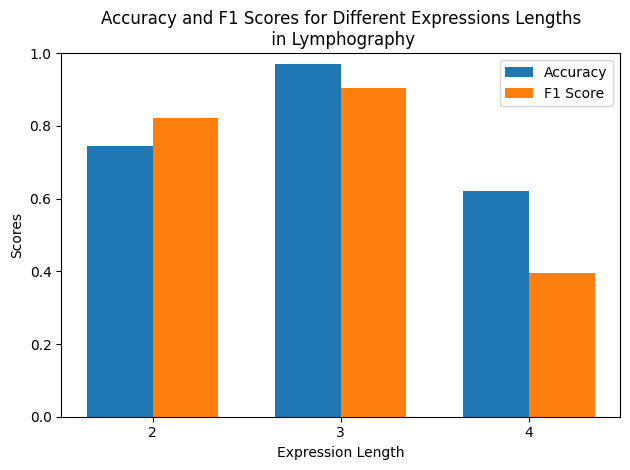

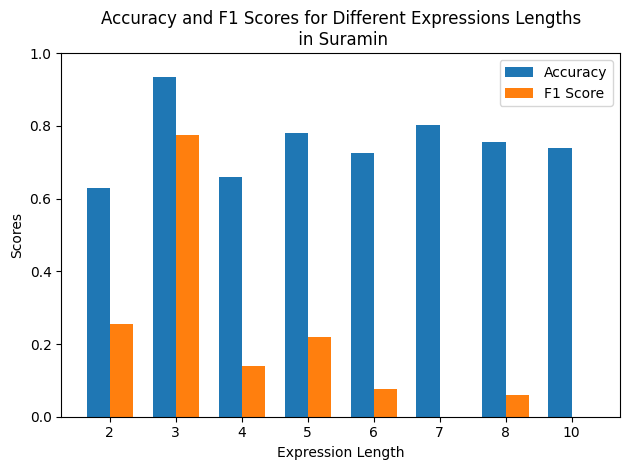

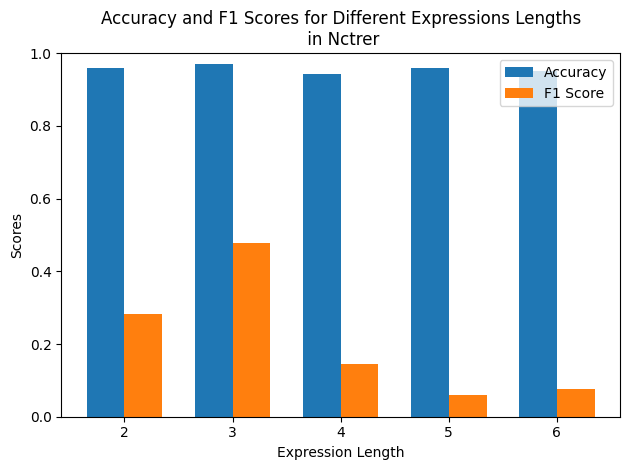

In [47]:
for data_name in kb:
    with open(f'./metrics/{data_name}/{data_name}_performance_per_len_updated.json', 'r') as f:
        data = json.load(f)
    # print(data)

    classes = list(data.keys())
    accuracy = [data[cls]['accuracy'] for cls in classes]
    f1_scores = [data[cls]['f1'] for cls in classes]

    x = np.arange(len(classes))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
    rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Expression Length')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Scores')
    ax.set_title(f'Accuracy and F1 Scores for Different Expressions Lengths\n in {data_name.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    plt.savefig(f'./metrics/images/testing_accuracy_f1_{data_name}.pdf')
    plt.savefig(f'./metrics/images/testing_accuracy_f1_{data_name}.eps')

    fig.tight_layout()

In [102]:
!ls metrics/animals/

animals_accuracies_Conjunction.json  animals_performance_per_len.json
animals_accuracies_Disjunction.json  animals_performance_per_len_updated.json
animals_accuracies_Negation.json     animals_testing_accuracies.json
animals_f1_Conjunction.json	     animals_testing_accuracies_today.json
animals_f1_Disjunction.json	     animals_testing_f1.json
animals_f1_Negation.json	     animals_testing_f1_today.json
